<b style='font-size:2em'>판다스 (Pandas)</b>

# Pandas 개요
- 데이터 분석과 관련된 다양한 기능을 제공하는 파이썬 패키지
    - 데이터 셋을 이용한 다양한 통계 처리 기능을 제공한다.
    - 표 형태의 데이터를 다루는데 특화된 파이썬 모듈.
        - 엑셀의 기능을 제공하는 파이썬 모듈이라고 생각하면 이해가 쉽다.
    - 표 형태의 데이터를 다루기 위한 **시리즈(Series)** 와 **데이터프레임(DataFrame)** 클래스 제공 !!!
        - Series : 1차원 자료구조를 표현
        - DataFrame : 2차원 행렬구조의 표(table)를 표현

- **설치**
    - `pip install pandas`
    - `conda instll pandas`
- **공식 홈페이지**
    - https://pandas.pydata.org/
    - https://pandas.pydata.org/docs/


# Series

## Series 개요
- **1차원** 자료구조
- DataFrame(표)의 **한 행(row)**이나 **한 열(column)**을 표현한다.
- 각 원소는 **index**와 i**ndex 이름**을 가지며 그것들을 이용해 사용할 수 있다.
- 벡터화 연산(element-wise 연산)을 지원
    - Series 객체에 연산을 하면 각각의 Series 원소들에 연산이 된다.
- Series를 구성하는 원소들을 다루는 다양한 메소드 제공    

## Series생성
- 구문
    - `Series(1차원 배열형태 자료구조)`
> #### 배열형태(array-like) 자료구조    
> - 리스트
> - 튜플
> - 넘파이 배열(ndarray)

In [2]:
# 판다스 import -> 별칭은 관례적으로 pd 를 준다.
import pandas as pd

In [3]:
# series 생성
s1 = pd.Series([10,20,30,40,50,60]) # 리스트의 원소들을 원소로 가지는 Series를 생성.
print(s1)

0    10
1    20
2    30
3    40
4    50
5    60
dtype: int64


```
index 이름         값

0                 10
1                 20
2                 30
3                 40
4                 50
5                 60

dtype: int64 ==> 값들의 타입
```


In [12]:
# Series 객체의 몇몇 속성 조회
print('데이터 타입: ', s1.dtype) #int64 -> 정수타입, 1개의 값을 64비트로 (8byte)로 저장. ->
                              # 판다스 데이터입은 numpy 의 데이터타입을 사용 -> numpy는 c의 datatype을 사용
print('전체 원소의 개수:',s1.size)# 전체 원소의 개수: 6
print('차원별 개수:', s1.shape)  # tuple , 개수: 6행

데이터 타입:  int64
전체 원소의 개수: 6
차원별 개수: (6,)


In [5]:
# int8 ,int16, int32, int64
# float16, float32, float64
# object: 문자열
s2 = pd.Series([1,2,300], dtype = 'int64') # 64bit 는  약 9경 이상을 저장할 수 있다.(메모리 잡아먹음)즉, 원소에 크기에 맞게 사용하면 좋음
print(s2.dtype) 
s2

int64


0      1
1      2
2    300
dtype: int64

In [10]:
s3 = pd.Series([1.0, 6.2, 7.9])
s3

0    1.0
1    6.2
2    7.9
dtype: float64

### Series안의 원소(element) 접근 - Indexing과 Slicing

- Index는 Series에 저장된 각 원소를 구분하는 식별자로 각 원소를 사용할때 사용한다. Series의 원소들은 두 종류의 index를 가진다.
    1. **index(순번)**
        - 자동으로 배정되는 순번. 
        - **리스트나 튜플의 index**와 동일하다.
        - 0 부터 1씩 증가하는 양수 index와 -1 부터 1씩 감소하는 음수 index 두가지가 붙는다. 양수 index는 앞에서 부터, 음수 index는 뒤에서 부터 붙는다.
    2. **index name(index이름)**
        - 명시적으로 각 index에 지정하는 이름
        - **딕셔너리의 key**의 역할을 한다.
            - Series의 index name은 중복될 수 있다. 
        - 생략하면 양수 index가 index name이 된다.
    - Index와 index name 두가지의 식별자가 붙는 것은 Series, DataFrame 동일하다.
    - Series나 DataFrame을 출력하면 나오는 index는 index name이다. 자동으로 붙는 index는 판다스 내부에서 관리된다.    

### Indexing
- 한개의 원소를 식별할 때 사용한다.
- **index 순번으로 조회**
    - `Series[순번]`
    - `Series.iloc[순번]`
- **index 이름으로 조회**
    - `Series[index 이름]`
    - `Series.loc[index 이름]`
    - index 이름이 문자열이면 문자열(" ") 로, 정수이면 정수로 호출
        - `s['name'], s[2], s.loc['name'], s.loc[2]`
    - Series.index 이름
        - index의 이름이 **파이썬 식별자 규칙에 맞을** 경우 `. 표기법` 사용 할 수 있다.. 
    
- **Series[index]는 기본적으로 Index명으로 조회한다.**
    - index 이름과 index의 타입이 다르면 알아서 처리해준다. 
    - index 이름의 type이 int일 때 index(순번)으로 조회하고 싶은 경우 (index이름과 index 의 타입이 int로 같은 경우를 말한다.)
        - iloc indexer를 사용  
        - `Series객체.iloc[순번]`
- **팬시(fancy) 인덱싱**
    -`Series[index리스트]`
    - 한번에 여러개의 원소를 조회할 때 그 index들을 list로 묶어서 전달한다.
        - `series[[1,2,3]]`
    

In [16]:
# indexer를 사용 - index, index 이름 둘다 사용.
s1[0] # index 이름으로 조회
s1[5]

60

In [ ]:
dataframe

index, column


In [17]:
s1[20] # 없는 index 조회하면 Exception 발생.

KeyError: 20

In [21]:
s2 = pd.Series([100, 80, 90, 60], index = ['Python', "Java", 'C', "JS"])
s2

Python    100
Java       80
C          90
JS         60
dtype: int64

In [24]:
# Series의 index 이름을 조회
print(s2.index) #인덱스 조회
s1.index

Index(['Python', 'Java', 'C', 'JS'], dtype='object')


RangeIndex(start=0, stop=6, step=1)

In [26]:
s2[0], s2[-4], s2['Python']

(100, 100, 100)

In [27]:
s2.iloc[0], s2.iloc[-4], s2.loc['Python'] # 순번 - iloc indexer, 이름 - loc indexer

(100, 100, 100)

In [29]:
s3 = pd.Series([30,50,90], index =[100,200,300])
s3

100    30
200    50
300    90
dtype: int64

In [30]:
s3[100] #기본: index이름 조회

30

In [33]:
# s3[0]  이름이 0인 원소를 조회
s3.iloc[0] # index 이름이 정수형일 경우에는 순서로 조회할 때 iloc index를 사용한다.

30

In [37]:
# 한번에 여러개 원소 조회
print(s1[0], s1[1], s1[3]) # 리스트 방식
print()
print(s1[[0,1,3]])         # 조회결과를 Series로 묶어서 반환.

10 20 40

0    10
1    20
3    40
dtype: int64


In [47]:
# Series는 리스트같이 원소를 변경할 수 있다.
s2[0] = 50
s2

Python     50
Java      100
C          90
JS         60
dtype: int64

In [46]:
s2['Java'] = 100
s2

Python     50
Java      100
C          90
JS         60
dtype: int64

In [49]:
# index이름이 식별자 규칙에 맞으면 . 표기법으로 조회/변경가능
s2['JS'], s2.JS

(60, 60)

### Slicing
- 범위로 원소들을 조회할 때 사용한다.
- **Series[start index :  stop index : step]**
    - start index 생략 : 0번 부터
    - stop index
        - **index 순번일 경우는 포함 하지는다.**
        - **index 명의 경우는 포함한다.**
    - stop index 생략 : 마지막 index까지
    - step 생략 : 1씩 증가
- **Slicing의 결과는 원본의 참조(View)를 반환**
    - Slicing은 shallow copy를 한다. 그래서 slicing한 결과를 원소를 변경하면 slicing 했던 원본도 같이 바뀐다.
    - 원본은 변경되지 않게 하려면 `slicing결과.copy()` 를 이용해 deep copy를 해야 한다.

> - <b style='font-size:1.3em'>shallow copy와 deep copy</b>
>    - **deep copy(깊은 복사)**
>        - 원본과 동일한 값을 가진 새로운 객체를 만들어 반환한다. 그래서 복사본의 값을 변경해도 원본이 변경되지 않는다.
>        - 파이썬 리스트는 slicing시 deep copy를 한다.
>    - **shallow copy(얕은 복사)**
>        - 원본을 반환하여 값 변경시 원본에 영향을 준다.
>        - Series, DataFrame, 넘파이 배열(ndarray)은 slicing 조회 시 shallow copy한다.
>    - **copy() 메소드**
>        - Series, DataFrame, ndarray를 deep copy 한다.

In [50]:
s5 = pd.Series(range(100)) # 0 ~ 99 를 원소로 가지는 시리즈
print(s5.dtype, s5.shape)

int64 (100,)


In [51]:
s5[10:20:5] # index로 slicing. stop이 포함안됨.

10    10
15    15
dtype: int64

In [52]:
s5.loc[10:20:5] # index name으로 slicing. stop index도 포함.

10    10
15    15
20    20
dtype: int64

In [53]:
s5[10:20] # step 생략 ->1

10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
dtype: int64

In [55]:
s5[90:] #stop 생략 -> 끝까지

90    90
91    91
92    92
93    93
94    94
95    95
96    96
97    97
98    98
99    99
dtype: int64

In [54]:
s5[50::5] 

50    50
55    55
60    60
65    65
70    70
75    75
80    80
85    85
90    90
95    95
dtype: int64

In [56]:
s5[:10] # start생략 : index 0부터

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [57]:
s5[90:-2]

90    90
91    91
92    92
93    93
94    94
95    95
96    96
97    97
dtype: int64

In [59]:
 s5[50:10:-3] # start > stop, step:음수 -> 뒤에서부터 거꾸로 조회(reverse)

50    50
47    47
44    44
41    41
38    38
35    35
32    32
29    29
26    26
23    23
20    20
17    17
14    14
11    11
dtype: int64

In [66]:
s6 = pd.Series(range(10), index = list("zaicbrdekj"))
s6

z    0
a    1
i    2
c    3
b    4
r    5
d    6
e    7
k    8
j    9
dtype: int64

In [67]:
s6['i':"e"]

i    2
c    3
b    4
r    5
d    6
e    7
dtype: int64

In [68]:
s6['a':'k':3]

a    1
b    4
e    7
dtype: int64

In [72]:
s6['e':'i':-1]

e    7
d    6
r    5
b    4
c    3
i    2
dtype: int64

In [73]:
# slicing한 결과의 원소를 변경
result = s6.iloc[2:6] # iloc index -> 순번으로 조회
result

i    2
c    3
b    4
r    5
dtype: int64

In [75]:
s6 



z    0
a    1
i    2
c    3
b    4
r    5
d    6
e    7
k    8
j    9
dtype: int64

In [76]:
result[0] = 500000 # slicing 결과의 원소를 변경하면 원본의 값도 같이 바뀐다. -> shallow copy
result

i    500000
c         3
b         4
r         5
dtype: int64

In [78]:
# slicing 결과를 변경하되 원본은 유지하려하면 copy() 해서 새로 만들어야 한다.
result2 = s6['r':'k'].copy() # deep copy
result2[0] =100000
result2

r    100000
d         6
e         7
k         8
dtype: int64

In [79]:
s6 

z         0
a         1
i    500000
c         3
b         4
r         5
d         6
e         7
k         8
j         9
dtype: int64

## 벡터화 (연산)
- Pandas의 Series나 DataFrame은 연산을 하면  원소 단위로 연산을 한다.
    - **element-wise 연산** 이라고도 한다.
- Series/DataFrame과 값(scalar값)을 연산하면 각 원소들과 값을 연산한다.
- Series끼리 또는 DataFrame끼리 연산을 하면 같은 위치의 원소끼리 연산을 한다.
    - **Index 이름**이 (index가 아닌) 같은 원소끼리 연산한다. 

In [89]:
s10 = pd.Series([10, -10, 5, 2])
s10 + 5
s10 * 2
s10 > 0
(s10 > -5) & (s10 < 5) # 판다스에선 비교연산자가 지원 X 따라서 and 가 아니라 & 사용.
                       # & 사용함으로써 연산자에 () 사용. 

0    False
1    False
2    False
3     True
dtype: bool

In [90]:
s11 = pd.Series([-10, 2, 3, 7])
s10 + s11 # 같은 index 이름끼리 계산

0    0
1   -8
2    8
3    9
dtype: int64

In [95]:
s10 <= s11

0    False
1     True
2    False
3     True
dtype: bool

In [97]:
grade1 = pd.Series([100, 90, 70, 80])
grade2 = pd.Series([80, 100, 90, 100], index = ['영어', '수학','국어', '과학'])
grade3 = pd.Series([70, 80, 100, 100], index = ['영어', '수학','국어', '과학'])

# index가 이름 , [70 ~ 100]는 순번


In [98]:
grade1 + grade2

0    NaN
1    NaN
2    NaN
3    NaN
과학   NaN
국어   NaN
수학   NaN
영어   NaN
dtype: float64

In [99]:
grade2 + grade3 # 같은 이름끼리 계산

영어    150
수학    180
국어    190
과학    200
dtype: int64

In [101]:
grade2 > grade3

영어     True
수학     True
국어    False
과학    False
dtype: bool

## Boolean 인덱싱
- Series의 indexing 연산자에 boolean 리스트를 넣으면 True인 index의 값들만 조회한다. 
    - **원하는 조건의 값들을 조회**할 때 사용한다.
|논리연산자|설명|
|:-:|-|
|&|and연산|
|\||or연산|
|~|not 연산|
    
    - 논리연산자의 피연산자들은 반드시 ( )로 묶어준다.
    - 파이썬과는 다르게 `and`, `or`, `not`은 예약어는 사용할 수 없다.

In [105]:
s10

0    10
1   -10
2     5
3     2
dtype: int64

In [104]:
s10[[True, False, True, False]] 
# 대상 Series 와 같은 shpae mooelean 배열을 indexer 넣는다. =>> True index 의 값들을 조회

0    10
2     5
dtype: int64

In [109]:
s10[s10 >= 0] # 특정 조건을 만족하는 값들만 사용하고 싶을때 bool형 조건을 사용한다!!!!!!

0    10
2     5
3     2
dtype: int64

In [243]:
import numpy as np
s20 = pd.Series(np.random.randint(0,1000,100)) # 0 ~ 1000 사이의 숫자를 100개 random 하게 생성(난수 - random value)
s20

0     603
1     472
2     717
3     645
4     288
     ... 
95    545
96    963
97    180
98    868
99    746
Length: 100, dtype: int64

In [245]:
# s20의 원소중에 900이상인 값들만 조회
s20[s20 >= 900]

19    925
41    965
42    955
48    930
51    933
61    986
64    974
68    974
78    910
85    973
86    986
87    921
96    963
dtype: int64

In [246]:
# s20의 원소중 100 ~ 200 사이의 값들만 조회
s20[(s20 >= 100) & (s20 <= 200)]

9     134
14    183
20    185
43    153
46    192
81    159
84    173
97    180
dtype: int64

In [247]:
# s20의 원소중 100 ~ 900 사이가 아닌 값들을 조회  **(not =>> ~)**
s20[~((s20 >= 100) & (s20 <= 900))]

19    925
24      0
35     43
41    965
42    955
48    930
51    933
58     93
61    986
64    974
68    974
74     39
78    910
82     35
83     84
85    973
86    986
87    921
88     75
96    963
dtype: int64

In [248]:
# Series객체.between(a,b)  =>   a ~ b 사이의 값들인지 여부를 bool으로 확인
s20[s20.between(100,200)] 

9     134
14    183
20    185
43    153
46    192
81    159
84    173
97    180
dtype: int64

> - Series에서 
>     - 특정 조건이 True인 원소들을 조회:  boolean indexing
>     - 특정 조건이 True인 원소들의 index를 조회: numpy.where(boolean 연산)
>     - 특정 조건이 True인 원소와 False인 원소를 각각 다른 값으로 변경: numpy.where(boolean 연산, True변환값, False변환값)
    
    
> Numpy의 ndarray도 동일    

In [256]:
s20.between(200,250) # boolean indexing => 조건이 True인 원소(값)들 조회.

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [260]:
np.where(s20.between(200,250)) # numpy.where(boolean 자료구조) => True의 index(순번)들 조회

(array([22, 23, 34, 37, 45, 53, 55, 65, 73]),)

In [251]:
np.where(s20 > 500, '500초과', '500이하') # True인것 False 원소의 값을 각각 변경.

array(['500초과', '500이하', '500초과', '500초과', '500이하', '500초과', '500초과',
       '500초과', '500이하', '500이하', '500이하', '500초과', '500초과', '500초과',
       '500이하', '500초과', '500초과', '500초과', '500이하', '500초과', '500이하',
       '500초과', '500이하', '500이하', '500이하', '500초과', '500초과', '500초과',
       '500초과', '500이하', '500이하', '500초과', '500초과', '500이하', '500이하',
       '500이하', '500이하', '500이하', '500이하', '500이하', '500이하', '500초과',
       '500초과', '500이하', '500초과', '500이하', '500이하', '500이하', '500초과',
       '500초과', '500이하', '500초과', '500이하', '500이하', '500초과', '500이하',
       '500초과', '500초과', '500이하', '500이하', '500초과', '500초과', '500초과',
       '500초과', '500초과', '500이하', '500초과', '500이하', '500초과', '500초과',
       '500이하', '500초과', '500이하', '500이하', '500이하', '500초과', '500초과',
       '500초과', '500초과', '500이하', '500초과', '500이하', '500이하', '500이하',
       '500이하', '500초과', '500초과', '500초과', '500이하', '500초과', '500이하',
       '500이하', '500이하', '500초과', '500이하', '500초과', '500초과', '500이하',
       '500초과', '500

In [134]:
[v for v in s20 if v > 500]

[705,
 644,
 762,
 564,
 587,
 914,
 856,
 639,
 855,
 736,
 906,
 951,
 503,
 926,
 754,
 600,
 992,
 599,
 536,
 879,
 721,
 755,
 538,
 769,
 759,
 934,
 848,
 650,
 554,
 639,
 845,
 778,
 984,
 712,
 992,
 974,
 656,
 892,
 949]

## 주요 메소드, 속성

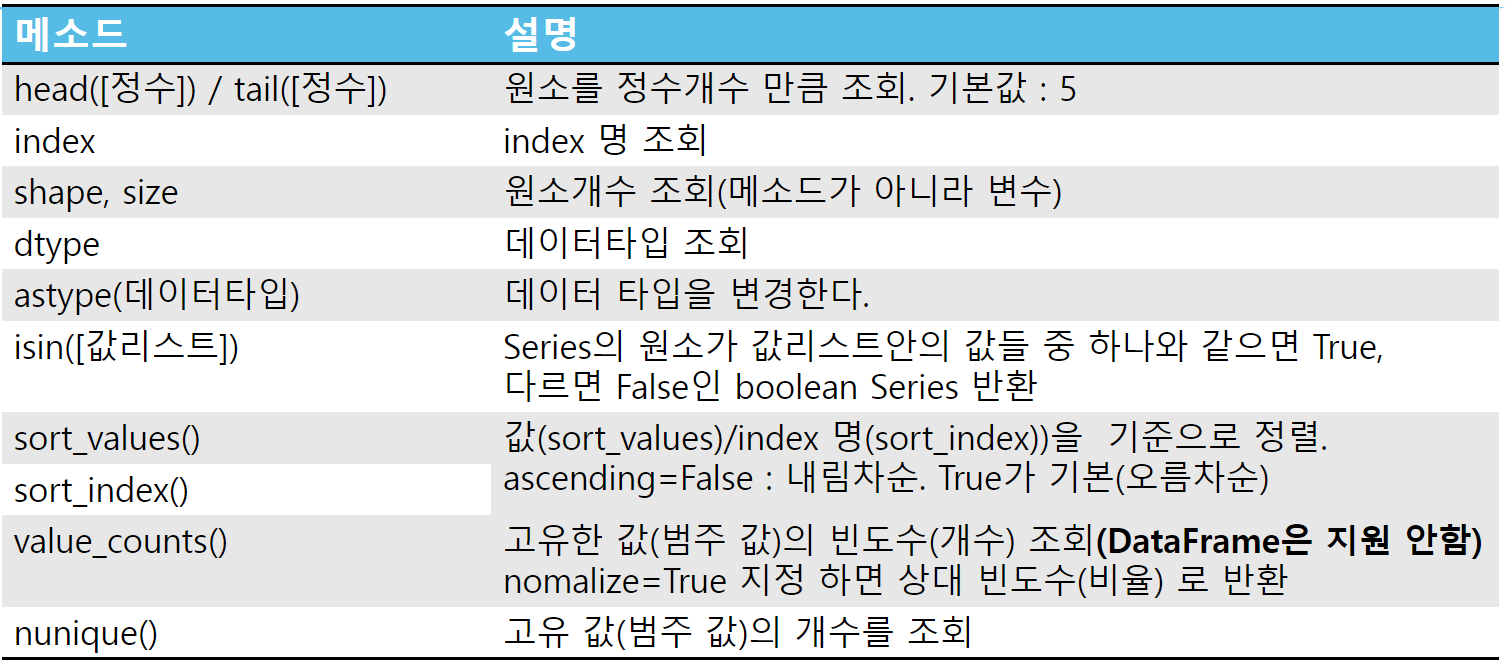

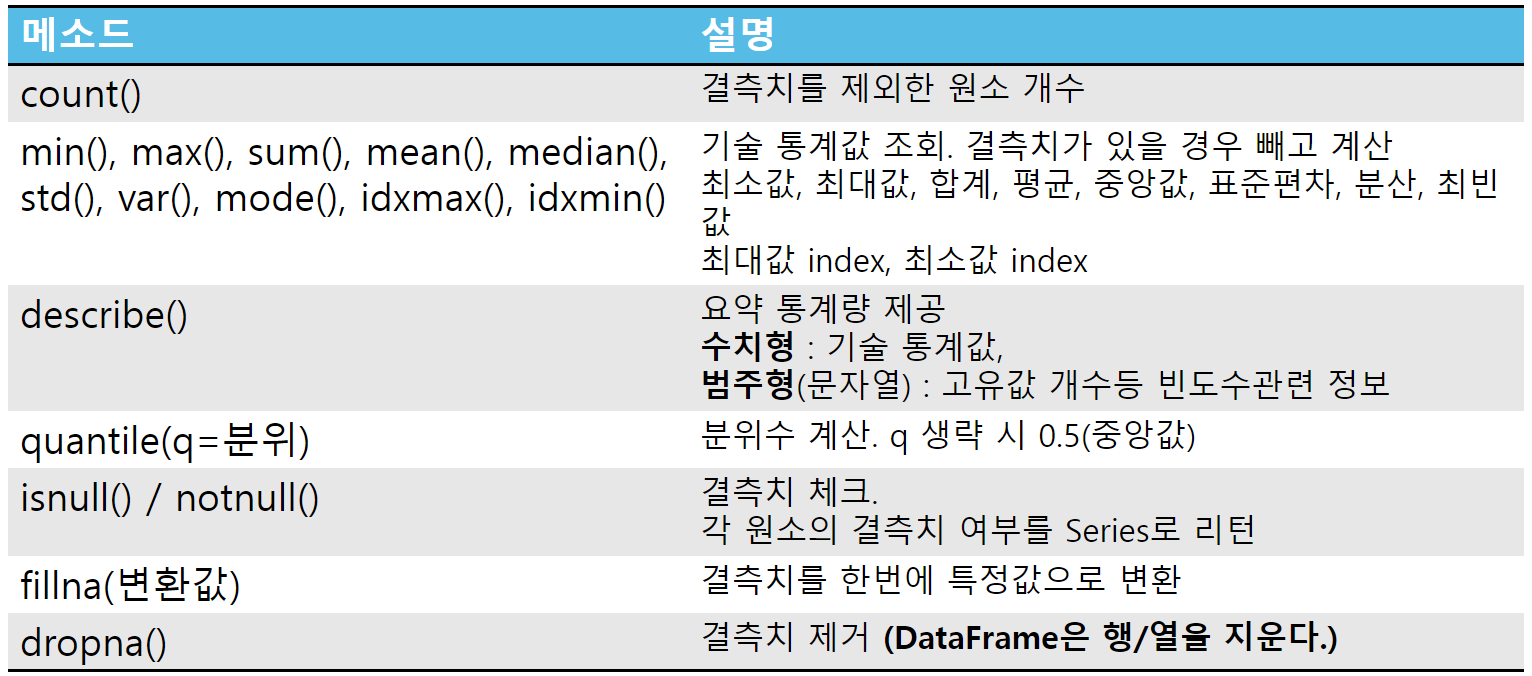

- abc 와 zxy 같은 문자열에서 min()을 사용할 경우 abc의 값이 나온다.
- 반대로 max() 적용시 zxy의 값이 나온다.

In [139]:
print(s20.dtype) # series 의 데이터 타입
print(s20.size) # 원소 개수
print(s20.shape) # Series의 형태-차원별 (축 - axis) 크기
print(s20.index) # index 이름을 조회.

int64
100
(100,)
RangeIndex(start=0, stop=100, step=1)


In [140]:
s20.head()  # 앞에서부터 5개만 조회
s20.head(3) # 개수 지정 => 잘 안씀.
s20[:5]     # 이렇게 쓰면 됨.


0    153
1    481
2    333
3    345
4      9
dtype: int64

In [142]:
s20.tail() # 뒤에 5개만 조회 => 잘 안씀.
s20.tail(2)
s20[-5:]   # 이렇게 사용하면 됨.

95    202
96    949
97     86
98    180
99    415
dtype: int64

In [151]:
# np.random.choice(['Python', 'Java', 'C', 'GO', 'Rust'],100)
# 특정 개수의 값으로만 구성된 자료구조 => 범주형(Categorical type)
s30 = pd.Series(np.random.choice(['Python', 'Java', 'C', 'GO', 'Rust'],100))

In [149]:
s30.value_counts() # s30을 구성하는 범주값들의 각각의 개수

C         21
Rust      21
Java      21
Python    20
GO        17
dtype: int64

In [153]:
s30.value_counts(normalize=True) # 각 원소의 전체비율 조회.

Java      0.27
C         0.23
Rust      0.19
GO        0.18
Python    0.13
dtype: float64

### 정렬
- **sort_values()**
    - 값으로 정렬
- **sort_index()**
    - index명으로 정렬
- 공통 매개변수
    - ascending=False (내림차순, 기본-True:오름차순)
    - inplace=True
        - 원본 자체를 정렬
        - False(기본값): 정렬결과를 새로운 Series로 반환.    
    - 결측치(NaN)는 정렬 방식과 상관없이 마지막에 나온다.


In [189]:
s40 = pd.Series([20,6,-10,100,7], index=['Z', 'R', 'A', 'B', 'S'])
s40

Z     20
R      6
A    -10
B    100
S      7
dtype: int64

In [190]:
s = s40.sort_index() # 오름차순을 기본으로 정렬 // 원본은 바뀌지 않고 새로운 파일을 만든거임.
s

A    -10
B    100
R      6
S      7
Z     20
dtype: int64

In [191]:
s40.sort_index(ascending=False) # 내림차순 정렬.

Z     20
S      7
R      6
B    100
A    -10
dtype: int64

In [204]:
s40.sort_index(inplace=True) # 원본(s40)이 바뀜.
s40

A    -10
B    100
R      6
S      7
Z     20
dtype: int64

In [193]:
s40

A    -10
B    100
R      6
S      7
Z     20
dtype: int64

In [205]:
# 값 기준 정렬
s40.sort_values()

A    -10
R      6
S      7
Z     20
B    100
dtype: int64

In [206]:
s40.sort_values(ascending=False) # 내림차순

B    100
Z     20
S      7
R      6
A    -10
dtype: int64

In [208]:
s40.sort_values(inplace=True) # s40 원본이 바뀜. #################
s40

A    -10
R      6
S      7
Z     20
B    100
dtype: int64

## 기술 통계량
- 데이터셋의 데이터들의 특징을 하나의 숫자로 요약한 것.
- ### 평균 
    - 전체 데이터들의 합계를 총 개수로 나눈 통계량
    - 전체 데이터셋의 데이터들은 평균값 근처에 분포되어 데이터셋의 대표값으로 사용한다.
    - 이상치(너무 크거나 작은 값)의 영향을 많이 받는다.


$$평균 = \cfrac{1}{n}\sum_{i=1}^{n}{X_i}$$
- ### 중앙값
    - 분포된 값들을 작은값 부터 순서대로 나열한 뒤 그 중앙에 위치한 값
    - 이상치에 영향을 받지 않아 평균대신 집단의 대표값으로 사용한다.
- ### 표준편차/분산
    - 값들이 흩어져있는 상태(분포)를 추정하는 통계량으로 분포된 값들이 평균에서 부터 얼마나 떨어져 있는지를 나타내는 통계량.
    - 각 데이터가 평균으로 부터 얼마나 차이가 있는지를 편차(Deviation)라고 한다. ($평균-데이터$)
    - 분산 : 편차 제곱의 합을 총 개수로 나눈 값 
    $$분산 = \cfrac{1}{n}\sum_{i=1}^{n}(평균-X_i)^2$$
    - 표준편차
        - 분산의 제곱근
        - 분산은 원래 값에 제곱을 했으므로 다시 원래 단위로 계산한 값.
    $$표준편차 = \sqrt{\cfrac{1}{n}\sum_{i=1}^{n}(평균-X_i)^2}$$

- ### 최빈값(mode)
    - 데이터 셋에서 가장 많이 있는 값.
- ### 분위수(Quantile)
    - 데이터의 크기 순서에 따른 위치값
        - 데이터셋을 크기순으로 정렬한뒤 N등분했을 때 특정 위치에서의 값 (단면)
        - N등분한 특정위치의 값들 통해 전체 데이터셋을 분포를 파악한다.
        - 대표적인 분위수 : 4분위, 10분위, 100분위
    - 데이터의 분포를 파악할 때 사용
    - 이상치 중 극단값들을 찾을 때 사용 (4분위수)
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile4.uf.tistory.com%2Fimage%2F99BCE04D5DF076AB2FA02D'>
<img src='https://t1.daumcdn.net/cfile/tistory/99E6BD465DF0782433'>

In [ ]:
나눈 위치의 값 => 분위수b

In [209]:
s40

A    -10
R      6
S      7
Z     20
B    100
dtype: int64

In [221]:
print(s40.max(), s40.min())       # 최대,최소
print(s40.idxmax(), s40.idxmin()) # 최대 / 최소값의 index 이름.
print(s40.sum(), s40.mean(), s40.median()) # 합계, 평균, 중앙값
print(s40.std(), s40.var())       # 표준편차, 분산

100 -10
B A
123 24.6 7.0
43.47182995918161 1889.8000000000002


In [215]:
s40.std()**2 # 표준편차 제곱은 분산이다.

1889.8

In [217]:
# 범주형
print(s30.mode()) # 최빈값 => 가장 개수가 많은 값 ==> Series로 묶어서 반환.

0    Java
dtype: object


In [220]:
s30.value_counts()

Java      27
C         23
Rust      19
GO        18
Python    13
dtype: int64

In [223]:
# 분위수 
s60 = pd.Series(np.random.randint(100,1000, 100))
s60

0     519
1     875
2     506
3     378
4     465
     ... 
95    490
96    606
97    448
98    457
99    442
Length: 100, dtype: int64

In [225]:
print('중위수(중앙값):', s60.median())

중위수(중앙값): 542.0


In [ ]:
# 분위수 -> quantile(q=[분위]) 분위: 0 ~ 1

In [227]:
s60.quantile(q=[0.5]) #중위수

0.5    542.0
dtype: float64

In [228]:
# 4분위 : 4등분 했을때 나뉘는 위치의 값
s60.quantile(q=[0.25,0.5,0.75])

0.25    318.50
0.50    542.00
0.75    842.75
dtype: float64

In [230]:
# 10분위수
s60.quantile(q=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

0.1    182.0
0.2    255.6
0.3    372.6
0.4    455.8
0.5    542.0
0.6    696.4
0.7    811.6
0.8    859.8
0.9    946.4
dtype: float64

In [231]:
r = s60.quantile(q=np.arange(0.1,1,0.1)) # np.arange(0.1,1,0.1) => o.1 ~ 1, 0.1씩 중가
r

0.1    182.0
0.2    255.6
0.3    372.6
0.4    455.8
0.5    542.0
0.6    696.4
0.7    811.6
0.8    859.8
0.9    946.4
dtype: float64

In [233]:
r[0.9]
r[0.4]

455.8

In [236]:
s60.count()

100

In [235]:
s60.describe() #count(): 결측치 아닌 원소의 개수

count    100.000000
mean     565.990000
std      284.749775
min      102.000000
25%      318.500000
50%      542.000000
75%      842.750000
max      996.000000
dtype: float64

In [242]:
s30.describe?

In [240]:
# 원소들이 볌주형, 문자열 타입일떄 
s30.describe()

count      100
unique       5
top       Java
freq        27
dtype: object

```
count      100 # 결측치 아닌 원소들의 개수
unique       5 # 고유값(범주값)의 개수
top       Java # 최빈값
freq        27 # 최빈값의 빈도수(개수)
dtype: object
```

In [241]:
s30.value_counts()

Java      27
C         23
Rust      19
GO        18
Python    13
dtype: int64

## 결측치 (Missing Value, Not Available)
- 결측지: 모르는 값, 수집이 안된값, 현재 가지고 있지 않은 값.
- 판다스에서 결측치
    - None, numpy.nan, numpy.NAN
    - 결측치는 float 타입으로 처리한다.
        - 많은 value중 float 타입의 값이 하나 있으면 모든 값들은 **float타입**으로 나온다.
    
### 결측치 확인
- 각 함수/메소드는 각 원소별로 결측치인지 확인해서 결과를 반환한다.
- Numpy
    - np.isnan(배열)
    ```python
import numpy as np
a = np.array([1,np.nan])
np.isnan(a)
```

- Series/DataFrame
    - Series/DataFrame객체**\.isnull()**, 또는 **\.isna()**
    - Series/DataFrame객체**\.notnull()**, 또는 **\.notna()**

In [ ]:


-------------------
# 결측지 존재여부 확인.
# 어떻게 처리할지.(없에거나, 다른 값으로 적용거나)

### 결측치 처리
- 제거 
    - dropna()
- 다른값으로 대체 
    - fillna()
    - 평균, 중앙값, 최빈값을 주로 사용 

In [7]:
import pandas as pd
import numpy as np

In [8]:
s = pd.Series([10, 2, 40, 7, 20, np.nan, 50, np.nan, 10]) # 결측지가 추가됨으로서 dtype이 int 가 아닌 float으로 나옴.
s

0    10.0
1     2.0
2    40.0
3     7.0
4    20.0
5     NaN
6    50.0
7     NaN
8    10.0
dtype: float64

In [ ]:
s = pd.Series([skdlskdlksdlksdl, skdlks, djksdlj,na.nan])
result = s.insull()

In [9]:
# 결측지 확인
result = s.isnull() # 원소별로 결측이 인지(True) 아닌지(False) 체크
result

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7     True
8    False
dtype: bool

In [10]:
s.isna() 

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7     True
8    False
dtype: bool

In [11]:
# 결측치를 처리
# 제거
s.dropna() # 결측치를 제거한 결과를 새 Series에 담아서 반환 (S는 변경안됨) 원본 변경 -> inplace = True

0    10.0
1     2.0
2    40.0
3     7.0
4    20.0
6    50.0
8    10.0
dtype: float64

In [13]:
s2 = s.copy()
s2.dropna(inplace=True)
s2

0    10.0
1     2.0
2    40.0
3     7.0
4    20.0
6    50.0
8    10.0
dtype: float64

In [15]:
# 결측치를 다른 값으로 대체
s.fillna(1000000)

0         10.0
1          2.0
2         40.0
3          7.0
4         20.0
5    1000000.0
6         50.0
7    1000000.0
8         10.0
dtype: float64

In [18]:
s.mean()  # 평균 구하기, # 판다스는 결측치를 빼고 계산한다.
s.mean(skipna=False) #결측치도 포함해서 계산.
s.sum(skipna=False)

nan

In [22]:
s.fillna(round(s.mean(), 2))  # 평균값을 소수점 2자리수까지 반올림 하고 그 값을 결측치 값으로 대체.
# s.fillna(round(s.median(), 2)) 

0    10.00
1     2.00
2    40.00
3     7.00
4    20.00
5    19.86
6    50.00
7    19.86
8    10.00
dtype: float64